<a href="https://colab.research.google.com/github/prishanmu/She-Ra/blob/master/She_Ra_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Look at the Princesses of Power

GitHub Repo: https://github.com/prishanmu/She-Ra

**Research Questions**: 


*   Who are the main or most active characters of this show? Does this change by season? 
*   What are the most common words used by characters in this show?
* What are the most "important" words spoken by certain characters on this show? 
* What are some relationships among words on this show? 
* Sentiment Analysis by Character and Season
* Data Modeling: Can we predict which lines were spoken by Adora? or Catra? 




# Import Statements & Data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS 
from collections import Counter
import nltk

In [23]:
df = pd.read_csv("she_ra_dialogue.csv")
df = df[df.dialogue!=' ']
df.dialogue.astype('str')
df.head()

,character,dialogue,season,episode
0,Adora,". Hey, princess. You looking at me?",1,1
1,Woman over PA,"All squadrons, report to training area immedi...",1,1
2,Adora,Psst. Anyone seen Catra?,1,1
4,Adora,Not again.,1,1
5,Unknown Blue Horde Member,"At attention, cadets. Your simulation is abou...",1,1


# Who are the main or most active characters of this show? Does this change by season?

Let's look at the characters with the highest number of lines: 

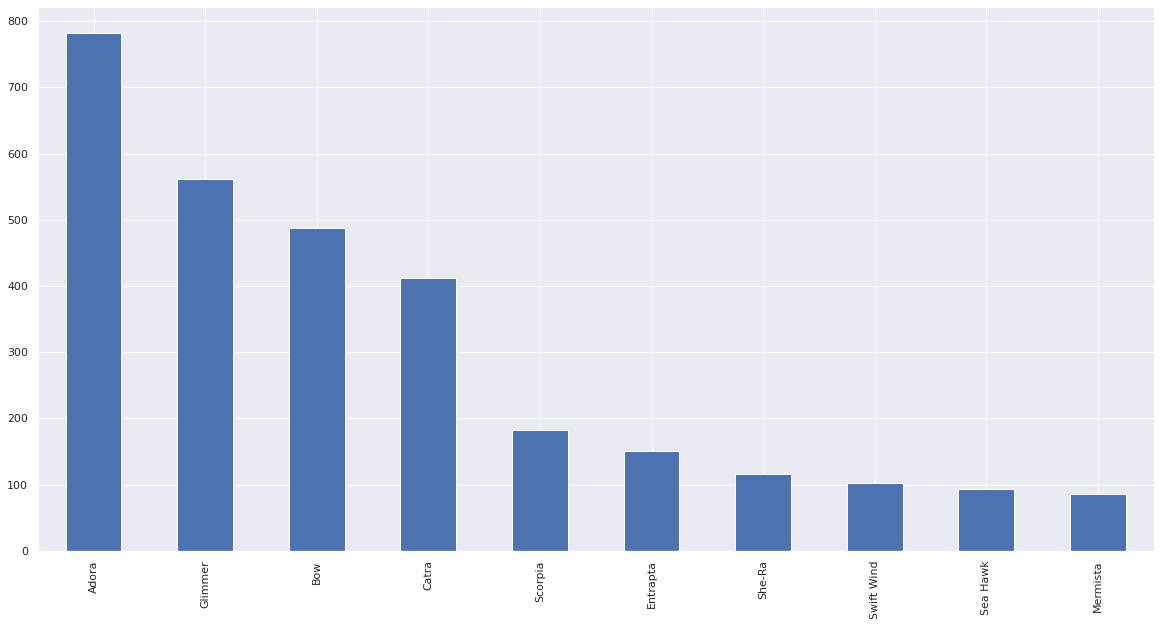

In [0]:
sns.set(style="darkgrid")

s = df.character.value_counts()[:10]

plt.figure(figsize=(20,10))
s.plot(kind="bar")
plt.show()


Unsurprisingly, Adora, aka She-Ra, has the most lines in the show and is the main character. Glimmer, Bow, and Catra, some of the people closest to Adora, are also top contenders for most lines in the show. 

Let's see how this might differ depending on season. 

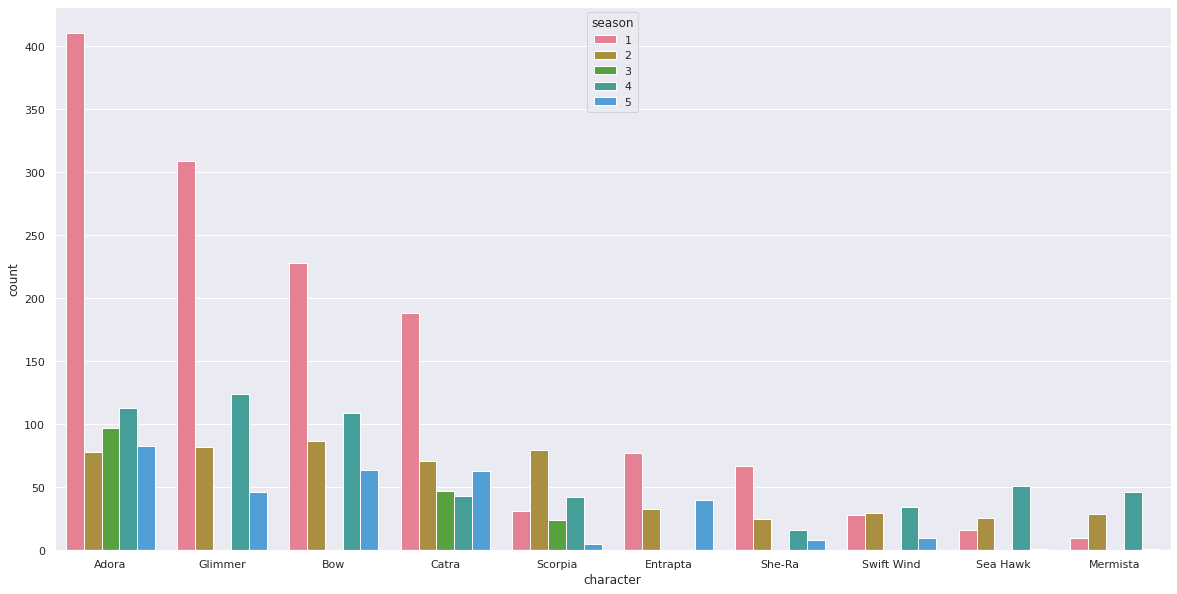

In [0]:
sns.set(style="darkgrid", palette = 'husl')

plt.figure(figsize=(20,10))

ax = sns.countplot(x="character", data=df, hue='season', order=df.character.value_counts().iloc[:10].index)

**add conclusion here once more seasons are added**

# What are the most common words used by characters in this show?

First, lets look at a wordcloud of the most common words on this show: 

In [0]:
# set up wordcloud
stopwords = set(STOPWORDS)

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", max_words=400, stopwords=stopwords, mask = mask)

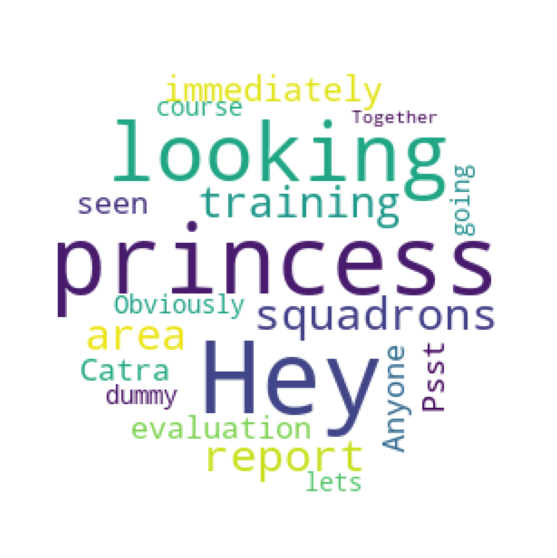

In [25]:
# show wordcloud of most common words in all dialogue
all_text = str(df.dialogue.values)

wordcloud = wc.generate(all_text)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now, let's look at the most common word spoken by the 20 most prominent characters. 

In [0]:
# word counter function (fix this)
def counter(text):
    cnt = Counter()
    for words in text:
        for word in words:
            cnt[word] += 1
    return word, count, total

In [0]:
top_20_characters = list(df.character.value_counts().iloc[:20].index)

most_common_word = []
word_count = []
word_proportion = []

for ch in top_20_characters: 
  s = df[df.character == ch]
  text = s.dialogue.values
  word, count, total = counter(text)
  most_common_word.append(word)
  word_count.append(count)
  proportion = str(float(count) / float(total) * 100) + '%'
  word_proportion.append(proportion)


In [0]:
most_common_word_df = pd.DataFrame(data = [top_20_characters, most_common_word, word_count, word_proportion], columns=['character', 'most common word', 'word count', 'percent of total words spoken'])